In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans 
from sklearn.linear_model import LogisticRegression
from google.colab import files
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import warnings
warnings.filterwarnings("ignore")

In [415]:

df = pd.read_csv('/content/2020-XTern-DS.csv') # loading CSV file
df.head(10) # displaying first 10 rows of the dataset

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes
5,ID_5221,39.370441,-85.739516,"South Indian, North Indian, Chinese",$15.00,$50.00,3.8,46,18,30 minutes
6,ID_3777,39.821806,-85.005577,"Beverages, Fast Food",$15.00,$50.00,3.7,108,31,30 minutes
7,ID_745,39.280324,-85.144363,"Chinese, Thai, Asian",$65.00,$50.00,4.0,1731,1235,45 minutes
8,ID_2970,39.268816,-85.602168,"Mithai, Street Food",$10.00,$50.00,3.9,110,26,30 minutes
9,ID_3474,39.874521,-85.439963,"Fast Food, North Indian, Rolls, Chinese, Momos...",$20.00,$50.00,3.9,562,294,65 minutes


# Correcting the data type of selected data columns while handling inappropriate data


In [416]:
# Correcting the datatype of <Rating, Votes, Reviews> column

df['Rating'] = df['Rating'].replace('-', 0) # Replacing null ratings values to 0
df['Rating'] = df['Rating'].replace('NEW', 0) # Replacing rows with 'NEW' values to 0
df['Rating'] = df['Rating'].replace('Opening Soon', 0) # Replacing rows with 'Opening Soon' values to 0
df['Rating'] = df['Rating'].astype(float) # Changing the data type from string to float

df['Votes'] = df['Votes'].replace('-', 0) # Replacing null votes values to 0
df['Votes'] = df['Votes'].astype(int) # Changing the data type from string to int

df['Reviews'] = df['Reviews'].replace('-', 0) # Replacing null reviews values to 0
df['Reviews'] = df['Reviews'].astype(int) # Changing the data type from string to int

# Creating an algorithm to find trending restarurants in Indianapolis by giving equal weights to variables like rating, votes and reviews

In [417]:
# Creating a new dataframe consisting of only <Restaurant, Rating, Votes, Reviews> column
df_trending_variables = df[['Restaurant','Rating','Votes','Reviews']]

# Adding three new columns to the new dataframe <Rating_Score, Votes_Score, Reviews_Score>  column.
# <Rating_Score> is calculated by the ( <Rating> / <SUM(rating)> * 100 * 0.3333333)
# <Votes_Score> is calculated by the ( <Votes> / <SUM(votes)> * 100 * 0.3333333)
# <Reviews_Score> is calculated by the ( <Reviews> / <SUM(Reviews)> * 100 * 0.3333333)

df_trending_variables['Rating_Score'] = df_trending_variables['Rating']/(df_trending_variables['Rating'].sum()*100*1/3)
df_trending_variables['Votes_Score'] = df_trending_variables['Votes']/df_trending_variables['Votes'].sum()*100*1/3
df_trending_variables['Reviews_Score'] = df_trending_variables['Reviews']/df_trending_variables['Reviews'].sum()*100*1/3


# <Total_Score> is calculated by summing up the <Rating_Score>, <Votes_Score>, <Reviews_Score>
df_trending_variables['Total_Score'] = df_trending_variables['Rating_Score'] + df_trending_variables['Votes_Score'] + df_trending_variables['Reviews_Score']

#Displaying a dataframe that contains the information of the top 10 restaurants in Indianapolis as calculated by the above algorithm
plot_df=df_trending_variables.nlargest(10, ['Total_Score']).reset_index(drop=True)
plot_df

,Restaurant,Rating,Votes,Reviews,Rating_Score,Votes_Score,Reviews_Score,Total_Score
0,ID_1064,4.7,9054,6504,0.000023,0.722673,1.061148,1.783845
1,ID_1666,4.6,4903,3989,0.000023,0.391348,0.650818,1.042189
2,ID_2885,4.3,4691,2547,0.000021,0.374427,0.415551,0.789999
3,ID_6511,3.9,4438,2576,0.000019,0.354233,0.420283,0.774535
4,ID_2601,4.1,4606,2311,0.000020,0.367642,0.377047,0.744710
5,ID_4202,4.0,4335,2363,0.000020,0.346012,0.385531,0.731563
6,ID_4202,4.0,4335,2363,0.000020,0.346012,0.385531,0.731563
7,ID_2051,4.7,3975,2359,0.000023,0.317277,0.384878,0.702179
8,ID_13,4.1,3860,1962,0.000020,0.308098,0.320107,0.628225
9,ID_8087,4.2,3782,1948,0.000021,0.301872,0.317822,0.619716


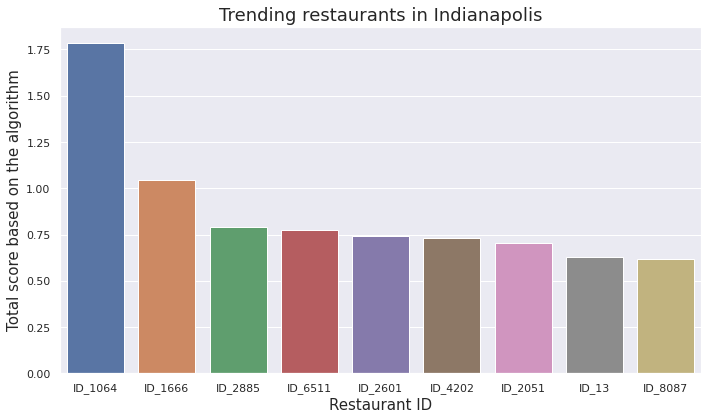

In [418]:
#Creating a seaborn plot that plots top ten trending restaurants in Indianapolis

plt.figure(figsize=(10,6))
# make barplot
sns.set()
sns.barplot(x='Restaurant', y= 'Total_Score', data=plot_df)
# set labels
plt.xlabel("Restaurant ID", size=15)
plt.ylabel("Total score based on the algorithm", size=15)
plt.title("Trending restaurants in Indianapolis", size=18)
plt.tight_layout()
plt.savefig("barplot_Seaborn_Python.png", dpi=200)

# Finding most popular cuisines served in Indianapolis

In [419]:
# First merging all the rows of the <Cuisines> column in a list
merge_cuisines = df['Cuisines'].tolist()

# Joining the item in a list to create a big string

merge_cuisines_str = ""

for i in merge_cuisines:
    merge_cuisines_str += str(i) + ","

# Now converting the string into a list using comma as splitter

merge_cuisines_list = merge_cuisines_str.split(',')

new_merge_cuisines_list = []

for i in merge_cuisines_list:
    new_merge_cuisines_list.append(i.strip())

new_merge_cuisines_list = new_merge_cuisines_list[:-1]

# Counting the occurences of each string in the combined list
most_popular_cuisines = Counter(new_merge_cuisines_list)

# Printing the list of tuples of most common cuisines
#most_popular_cuisines.most_common()

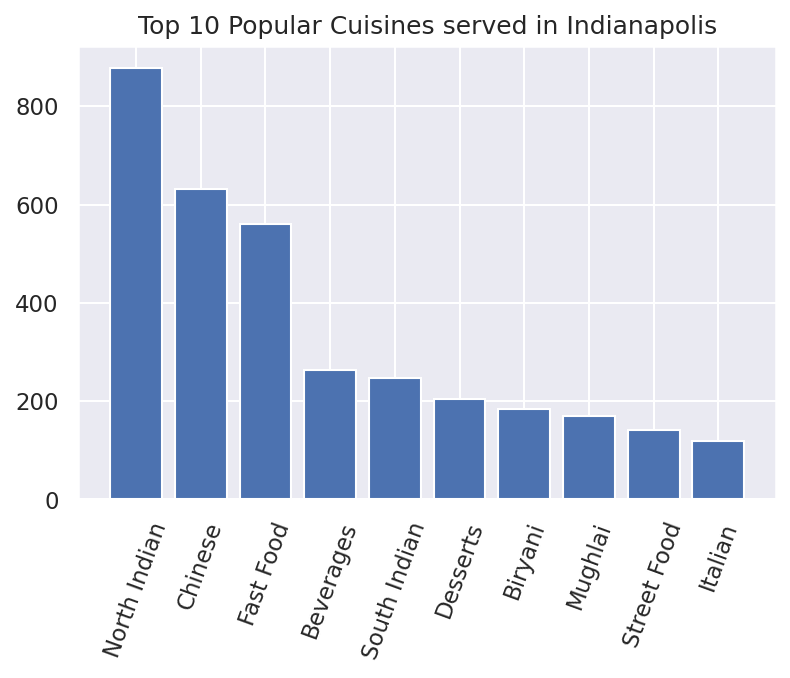

In [420]:
# Using matplotlib to plot 10 most popular cuisines

top_10_cuisines =most_popular_cuisines.most_common(10)
plt.figure(dpi=150)
plt.bar(range(len(top_10_cuisines)), [val[1] for val in top_10_cuisines])
plt.xticks(range(len(top_10_cuisines)), [val[0] for val in top_10_cuisines])
plt.xticks(rotation=70)
plt.title('Top 10 Popular Cuisines served in Indianapolis')
plt.savefig('most_popular_cuisine.png');

# Prediciting the cooking time from cuisines using three machine learning algorithms.






In [421]:
#Minor data cleaning before model preparation.
# Changing <Cook_Time> variable to represent numeric value
df["Cook_Time"] = df['Cook_Time'].str.replace("minutes","")
df["Cook_Time"] = df["Cook_Time"].str.strip()

# Changing cuisines from string to list
li = df['Cuisines'].str.split(",").tolist()
temp = []
for x in li:
  temp.append(list(map(str.strip,x)))
df['Cuisines'] = temp


In [422]:
# Using one hot encoding method to convert non-numeric items in cuisine column to numeric item by creative dummy variables

# Using cuisine column to predict cooking time

predictive_variables = df['Cuisines'].str.join('|').str.get_dummies() # Cuisines as a predictive variable

target_variable = df['Cook_Time'] # Cook_Time as a target variable


#Using scikit's learn <train_test_split> to split the dataset in 85% training and 15% testing

x_train, x_test, y_train, y_test = train_test_split(predictive_variables, target_variable, test_size=0.20)




In [423]:
# First running the decision tree algorithm on the training set

dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train) # fitting the model
y_pred = dtree.predict(x_test) # Using the fitted model to predict the target variable
dtree_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy of the decision tree algorithm in predicting the cooking time is {:.2f}.'.format(dtree_accuracy))

Accuracy of the decision tree algorithm in predicting the cooking time is 0.64.


In [424]:
# Running the random forest algorithm on the training set

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)
rforest_accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Accuracy of the Random Forest algorithm in predicting the cooking time is {:.2f}.'.format(rforest_accuracy))


Accuracy of the Random Forest algorithm in predicting the cooking time is 0.64.


In [425]:
# Running the logistic regression algorithm on the training set

l_model = LogisticRegression().fit(x_train, y_train)
y_predict = l_model.predict(x_test)
log_reg_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of the Random Forest algorithm in predicting the cooking time is {:.2f}.'.format(log_reg_accuracy))

Accuracy of the Random Forest algorithm in predicting the cooking time is 0.66.


# Using K-means clustering algorithm to determine best pickup zones for FoodieX food delivery service

In [426]:
lat_lon_df=df.loc[:,['Restaurant','Latitude','Longitude']] #Creating a new datadrame consisting of latitude and longitude
lat_lon_df.head(10)

,Restaurant,Latitude,Longitude
0,ID_6321,39.262605,-85.837372
1,ID_2882,39.775933,-85.740581
2,ID_1595,39.253436,-85.123779
3,ID_5929,39.029841,-85.332050
4,ID_6123,39.882284,-85.517407
5,ID_5221,39.370441,-85.739516
6,ID_3777,39.821806,-85.005577
7,ID_745,39.280324,-85.144363
8,ID_2970,39.268816,-85.602168
9,ID_3474,39.874521,-85.439963


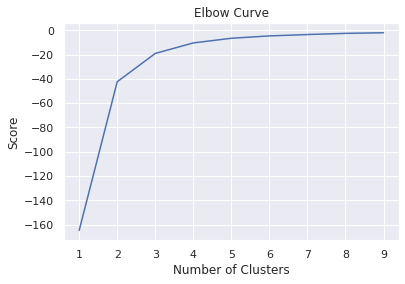

In [430]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))] #fitting the k-means model
plt.plot(K_clusters, score) #plotting the elbow curve to find the optimal score
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [431]:
# Running k-means algorithm to determines the latitude and longitude of 4 best pickup zones for FoodieX 
# since elbow curve shows that the best value for k would be around 4.

kmeans = KMeans(n_clusters = 4, init ='k-means++') 
# First, computing k-means clustering
kmeans.fit(X[X.columns[1:3]])  #fitting the model
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
pickup_zones = kmeans.cluster_centers_ # finding the coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point


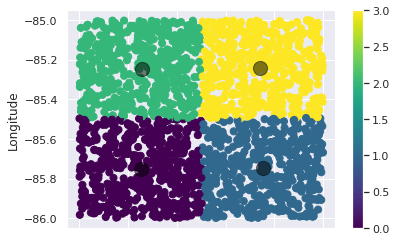

In [432]:
# plotting 4 best pickup zones for FoodieX
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(pickup_zones[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [433]:
print('The best pickup zones for FoodieX food delivery are:\n {}'.format(pickup_zones)) 
# the latitude and longitude for the best pickup_zone

The best pickup zones for FoodieX food delivery are:
 [[ 39.25413726 -85.75092214]
 [ 39.75333502 -85.74907981]
 [ 39.25492652 -85.24365223]
 [ 39.74026978 -85.24679707]]
